<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("glass.csv")
data.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Attribute Information:

# Id number: 1 to 214 (removed from CSV file)
# RI: refractive index
# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# Mg: Magnesium
# Al: Aluminum
# Si: Silicon
# K: Potassium
# Ca: Calcium
# Ba: Barium
# Fe: Iron
# Type of glass: (class attribute)
# 1 building_windows_float_processed -- 
# 2 building_windows_non_float_processed 
# 3 vehicle_windows_float_processed -- 
# 4 vehicle_windows_non_float_processed (none in this database) -- 
# 5 containers -- 
# 6 tableware -- 
# 7 headlamps

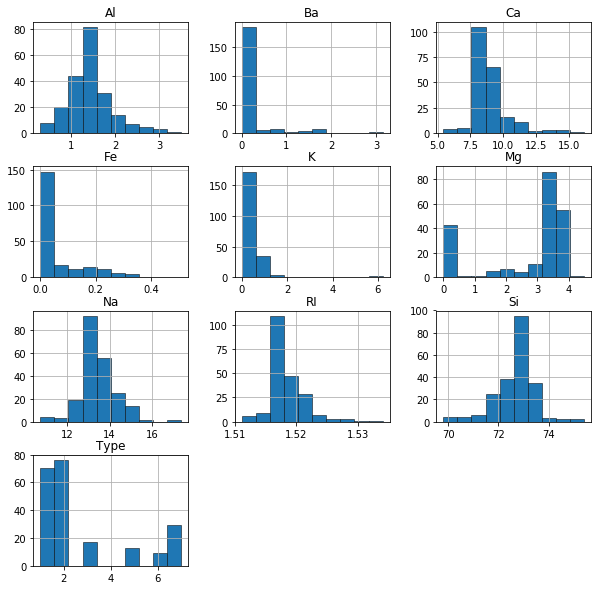

In [6]:
data.hist(edgecolor='black', linewidth=0.5)
plt.gcf().set_size_inches(10,10)
plt.show()

In [24]:
# Наблюдаем что распределния AI NA SI RI - близки к нормальному. 
# BA FE K - близки к логнормальному
# Распределения остальных элементов не относятся к известным нам - возможно изза того что нужно очистить от выбросов, 
# возможно изза того что данных не очень много и поэтому они не дотягивают до нормального


In [7]:
total = data.isnull().sum().sort_values(ascending = False)
total

Type    0
Fe      0
Ba      0
Ca      0
K       0
Si      0
Al      0
Mg      0
Na      0
RI      0
dtype: int64

In [29]:
#NaN данные отсутствуют

/Users/erik/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


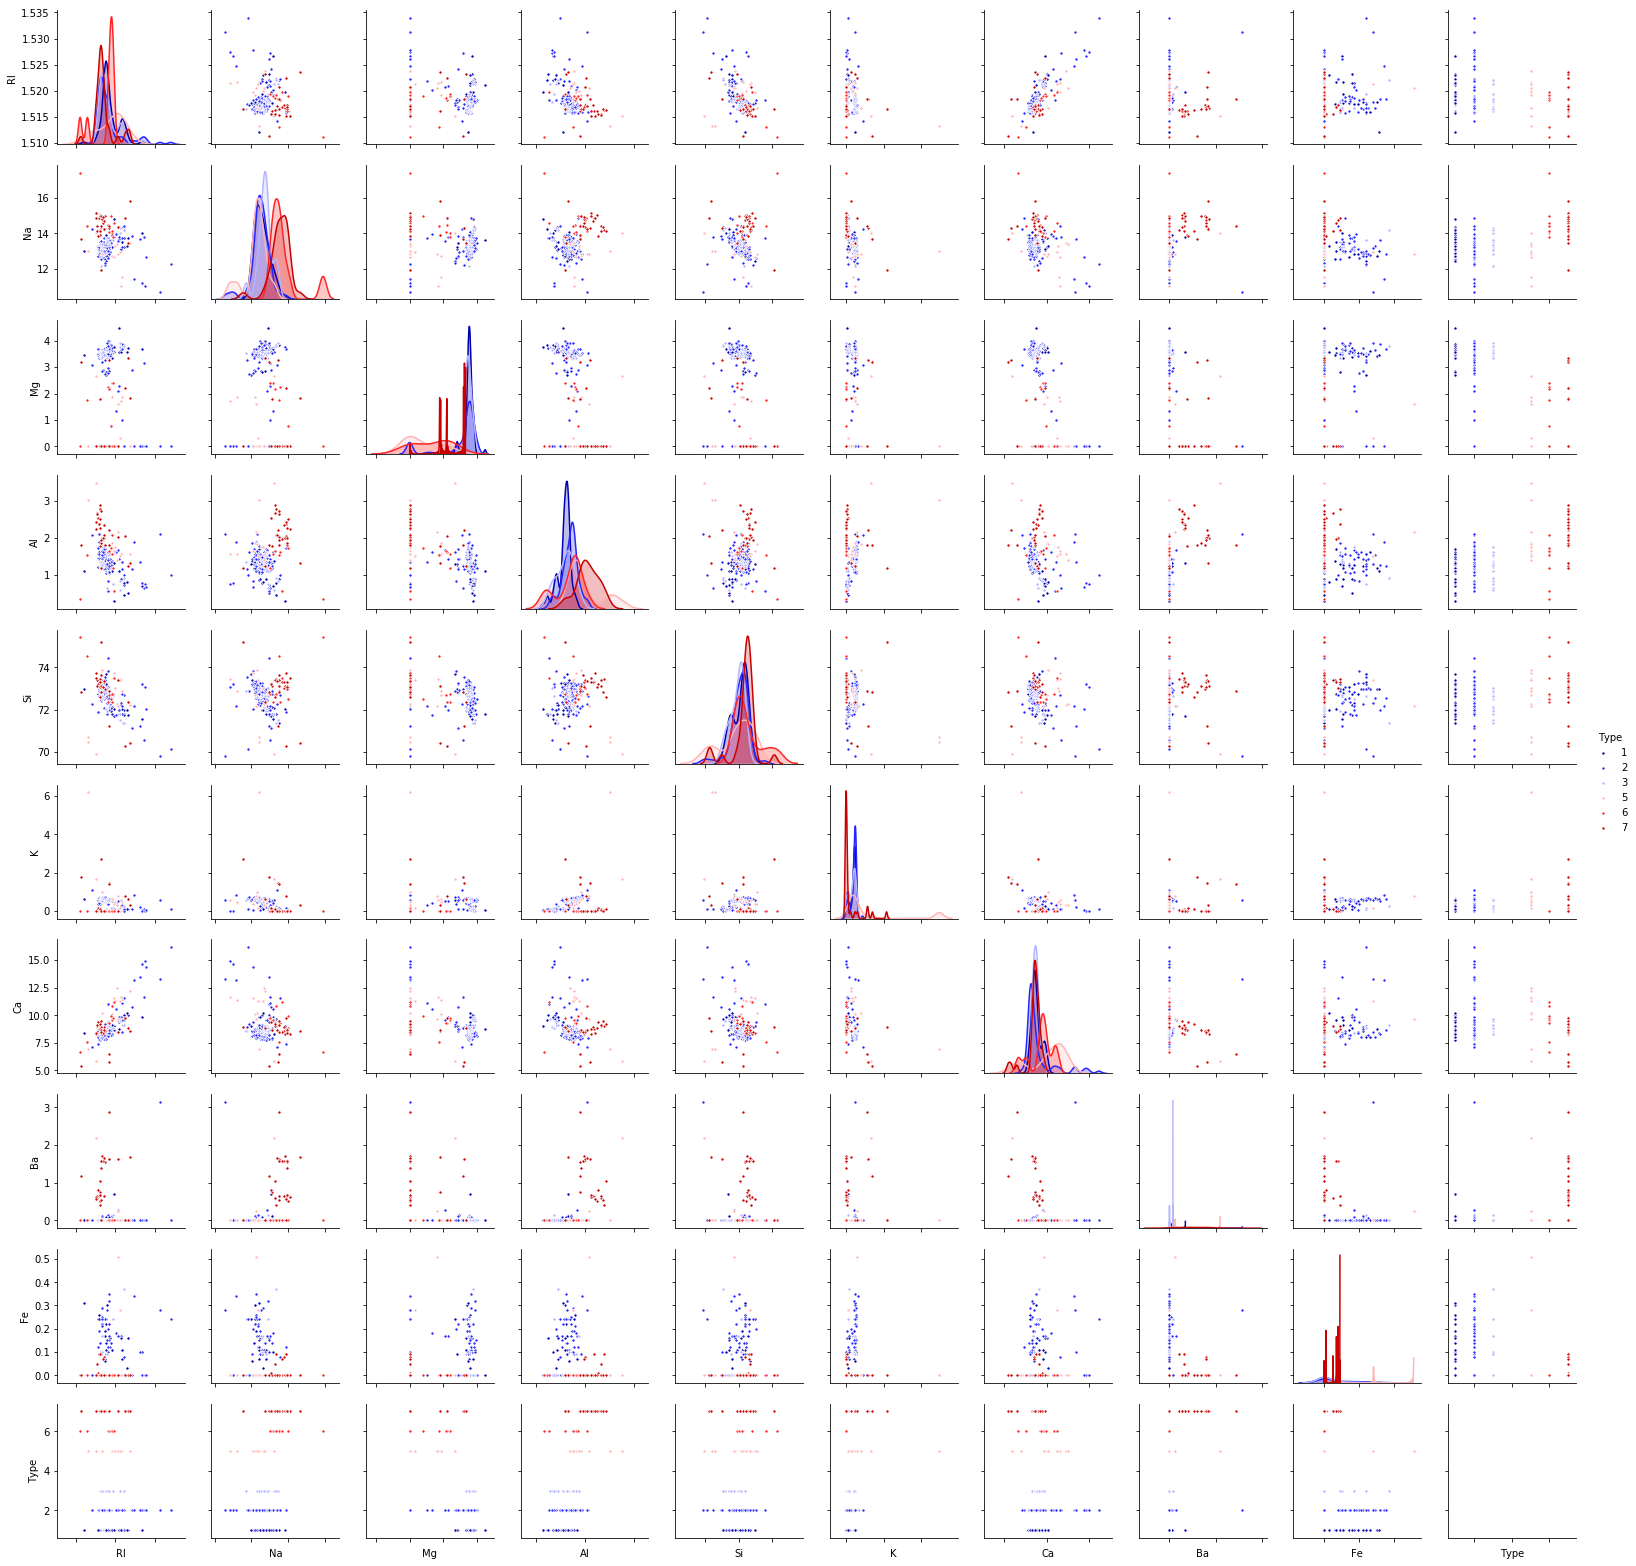

In [12]:
g = sns.pairplot(data=data, hue='Type', palette = 'seismic',
                 size=2.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [13]:
# Наблюдаем корреляцию между:
# Ri and SI
# Ri and CA

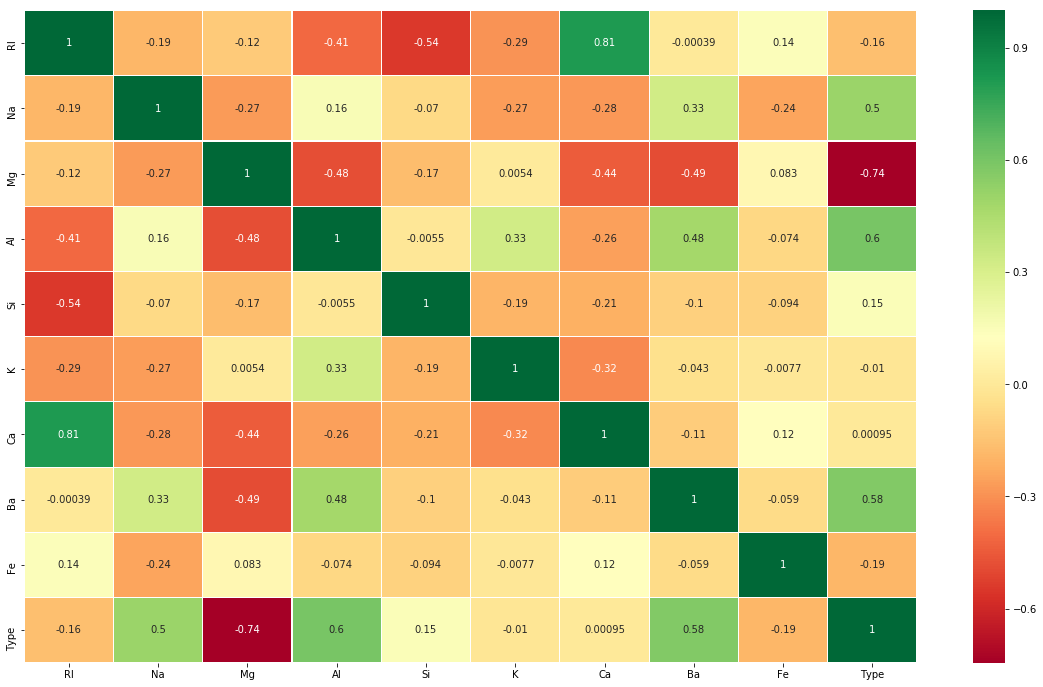

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig= plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [17]:
# Видим высокую обратную корреляцию MG  и TYPE. И также видим высокую корреляция CA и RI.

# 1) Чем больша магния тем меньше тип стикла => тоесть можно сделать вывод что стекла с большим содержанием магния используются 
# в окнах зданий/строительстве.

# 2) чем больше кальцие тем выше коэфициэнт переломления

In [20]:
correlation_matrix = data.corr(method ='pearson').round(2)
print(sorted(correlation_matrix['Type']))

[-0.74, -0.19, -0.16, -0.01, 0.0, 0.15, 0.5, 0.58, 0.6, 1.0]


In [ ]:
# значнеия имеют MG = -0.74, AI = 0.6, BA = 0.58

/Users/erik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


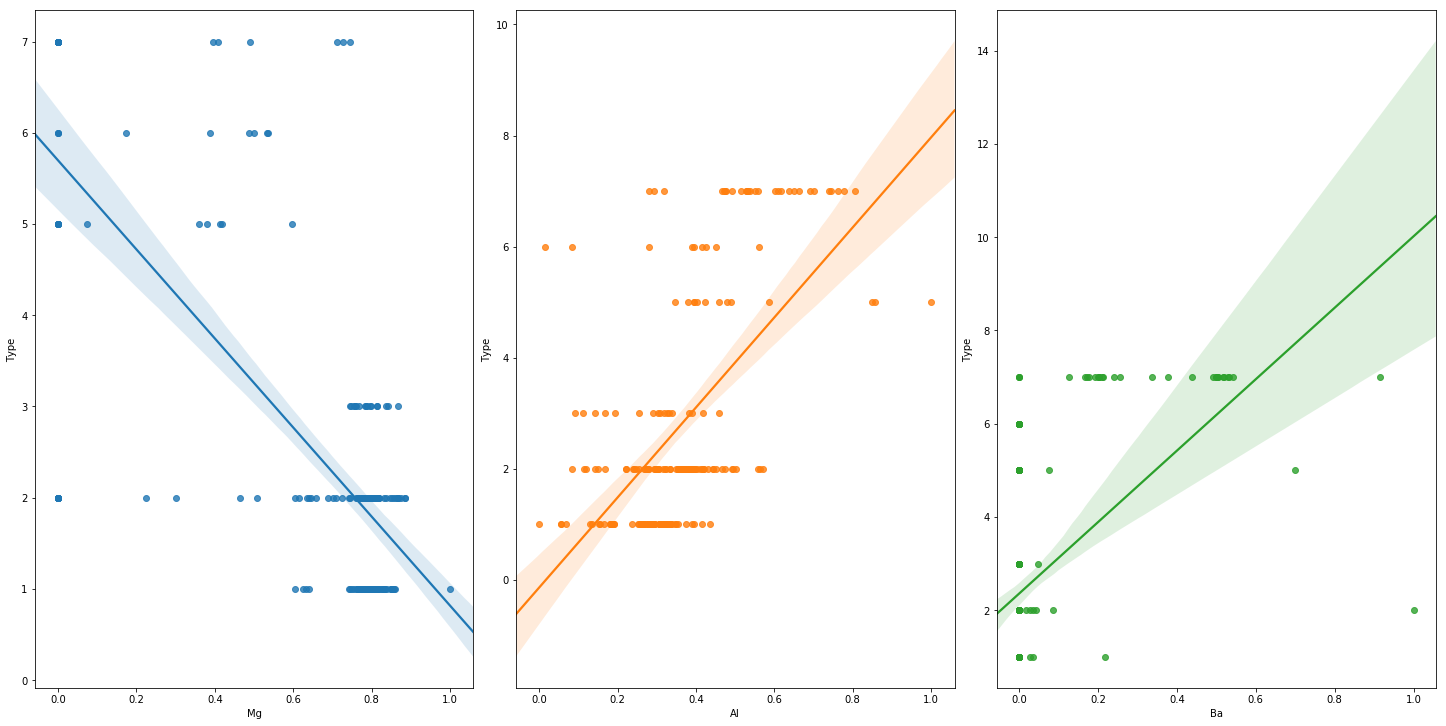

In [36]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Mg', 'Al', 'Ba']
x = data[column_sels]
y = data['Type']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [37]:
#Наблюдаем нелинейную зависимость типа стекла от компонентов.
#В первые типы стекл добаляют больше Магния чем в последние и в последние типы, добвыляют больше Алюминия и Бария 
# Я правильно понял что зависимость нелинейная потому что данные както странно разбросаны?

In [39]:
#Проанализируем кореляцию  с коефициэнтом переломления таким же образом как и с типом стекла

print(sorted(correlation_matrix['RI']))

[-0.54, -0.41, -0.29, -0.19, -0.16, -0.12, -0.0, 0.14, 0.81, 1.0]


/Users/erik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


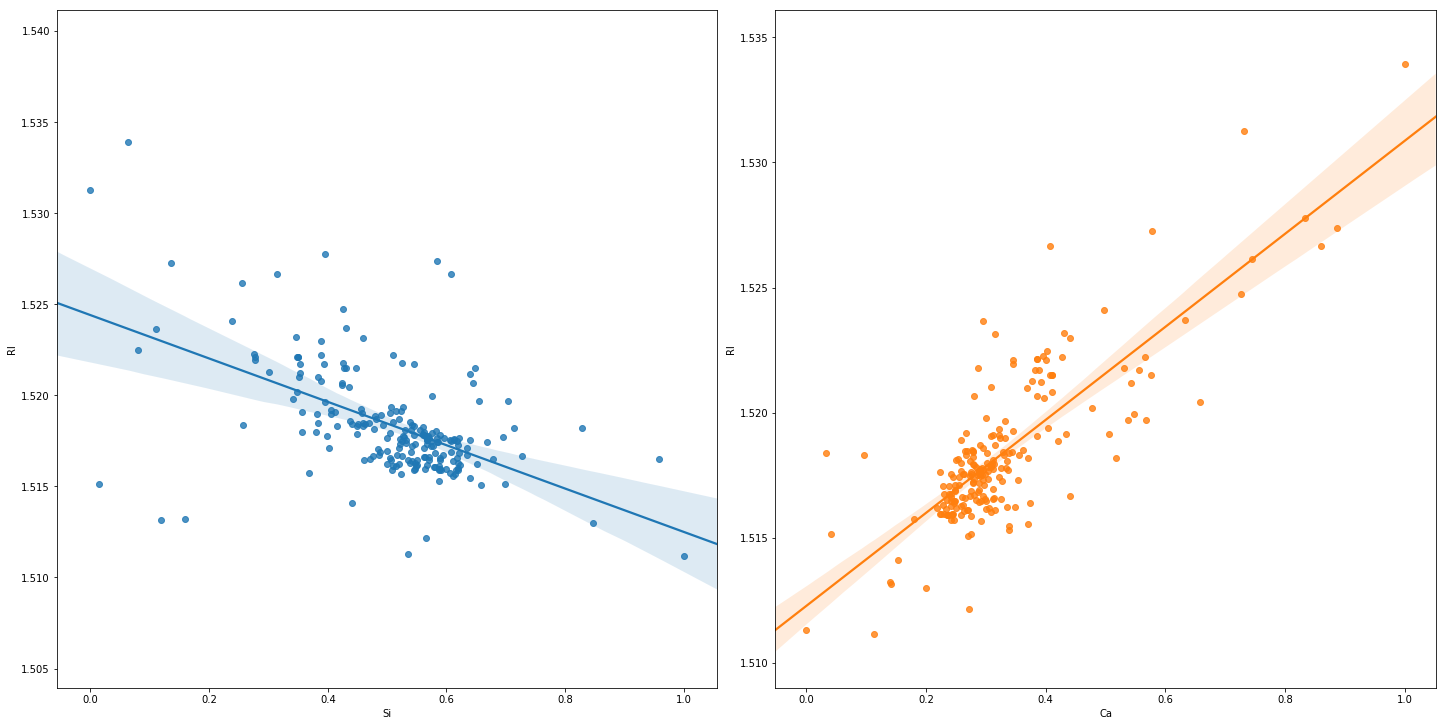

In [45]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Si', 'Ca']
x = data[column_sels]
y = data['RI']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [46]:
#Наблюдаем линейную зависимость
#Чем больше SI тем ниже коэфициэнт переломления
# Чем больше CA - тем выше коэфициэент преломления